## Fase 4 --- Modelagem

Esta fase está encarregada de todo o processo de modelagem dos dados. Os passos são condensados abaixo, e não são distinguidos individualmente.

Este notebook é quase inteiramente baseado em "https://github.com/google/eng-edu/blob/main/ml/pc/exercises/image_classification_part1.ipynb".

In [1]:
from google.colab import drive
drive.mount('/content/drive') # Load the data folder from here

Mounted at /content/drive


In [12]:
from keras import layers
from keras import Model

In [24]:
def modelWithDropout():
  # Our input feature map is 224x224x3: 224x224 the image pixels, and 3 for
  # the three color channels: R, G, and B
  img_input = layers.Input(shape=(224, 224, 3))

  # First convolution extracts 16 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(16, 3, activation='relu')(img_input)
  x = layers.MaxPooling2D(2)(x)

  # Second convolution extracts 32 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(32, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # Third convolution extracts 64 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(64, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # Flatten feature map to a 1-dim tensor so we can add fully connected layers
  x = layers.Flatten()(x)

  # Create a fully connected layer with ReLU activation and 512 hidden units
  x = layers.Dense(512, activation='relu')(x)

  # Add a dropout rate of 0.5
  x = layers.Dropout(0.5)(x)

  # Create output layer with a single node and sigmoid activation
  output = layers.Dense(1, activation='sigmoid')(x)

  # Create model:
  # input = input feature map
  # output = input feature map + stacked convolution/maxpooling layers + fully 
  # connected layer + sigmoid output layer
  model = Model(img_input, output)

  return model

def modelWoutDropout():
  # Our input feature map is 224x224x3: 224x224 the image pixels, and 3 for
  # the three color channels: R, G, and B
  img_input = layers.Input(shape=(224, 224, 3))

  # First convolution extracts 16 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(16, 3, activation='relu')(img_input)
  x = layers.MaxPooling2D(2)(x)

  # Second convolution extracts 32 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(32, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)
  
  # Third convolution extracts 64 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(64, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # Flatten feature map to a 1-dim tensor so we can add fully connected layers
  x = layers.Flatten()(x)

  # Create a fully connected layer with ReLU activation and 512 hidden units
  x = layers.Dense(512, activation='relu')(x)

  # Create output layer with a single node and sigmoid activation
  output = layers.Dense(1, activation='sigmoid')(x)

  # Create model:
  # input = input feature map
  # output = input feature map + stacked convolution/maxpooling layers + fully 
  # connected layer + sigmoid output layer
  model = Model(img_input, output)

  return model

In [25]:
model = modelWoutDropout()

In [19]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 64)        0   

In [28]:
from keras.optimizers import RMSprop

# RMSprop is good for binary classification problems, where one
# needs automatic tuning of metaparameters.
#
# lr is the learning rate
#
# Crossentropy is a very famous loss function for CNN
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "drive/MyDrive/data/train"
validation_dir = "drive/MyDrive/data/validation"

def trainWithAugmenting():
  # Adding rescale, rotation_range, width_shift_range, height_shift_range,
  # shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
  return ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

def trainWoutAugmenting():
  return ImageDataGenerator(rescale=1./255)

train_datagen = trainWoutAugmenting()

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 1978 images belonging to 2 classes.
Found 659 images belonging to 2 classes.


In [30]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=98,  # 1978 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=32,  # 659 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
98/98 - 106s - loss: 0.8539 - acc: 0.6073 - val_loss: 0.5251 - val_acc: 0.6531
Epoch 2/10
98/98 - 105s - loss: 0.5456 - acc: 0.7237 - val_loss: 0.5745 - val_acc: 0.7375
Epoch 3/10
98/98 - 104s - loss: 0.4872 - acc: 0.7692 - val_loss: 1.2693 - val_acc: 0.5281
Epoch 4/10
98/98 - 104s - loss: 0.4730 - acc: 0.7727 - val_loss: 0.4307 - val_acc: 0.8016
Epoch 5/10
98/98 - 104s - loss: 0.4519 - acc: 0.7967 - val_loss: 0.3899 - val_acc: 0.8172
Epoch 6/10
98/98 - 104s - loss: 0.4391 - acc: 0.8008 - val_loss: 0.3812 - val_acc: 0.8250
Epoch 7/10
98/98 - 104s - loss: 0.4153 - acc: 0.8172 - val_loss: 0.9664 - val_acc: 0.7703
Epoch 8/10
98/98 - 104s - loss: 0.3710 - acc: 0.8269 - val_loss: 0.4472 - val_acc: 0.8078
Epoch 9/10
98/98 - 104s - loss: 0.3645 - acc: 0.8437 - val_loss: 0.4186 - val_acc: 0.8109
Epoch 10/10
98/98 - 104s - loss: 0.3101 - acc: 0.8596 - val_loss: 0.5071 - val_acc: 0.7969


In [2]:
# This is just a reference, because the cell above may take
#   too long to finish executing.
#
# history = {'loss': [0.8539, 0.5456, 0.4872, 0.4730, 
#                     0.4519, 0.4391, 0.4153, 0.3710, 
#                     0.3645, 0.3101],
#            'acc':  [0.6073, 0.7237, 0.692, 0.7727, 
#                     0.7967, 0.8808, 0.8172, 0.8269, 
#                     0.8437, 0.8596],
#            'val_loss': [0.5251, 0.5745, 1.2693, 0.4307,
#                         0.3899, 0.3812, 0.9664, 0.4472,
#                         0.4186, 0.5071],
#            'val_acc': [0.6531, 0.7375, 0.5281, 0.8016,
#                        0.8172, 0.8250, 0.7703, 0.8078,
#                        0.8109, 0.7969]
#            }

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

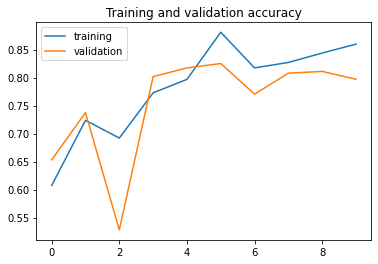

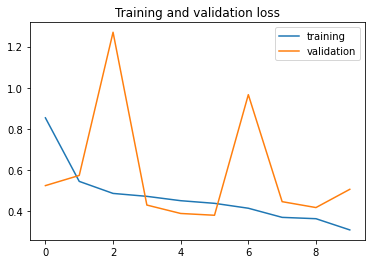

In [7]:
from google.colab import files
from matplotlib import pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label="training")
plt.plot(epochs, val_acc, label="validation")
plt.legend()
plt.title('Training and validation accuracy')
plt.savefig("/tmp/tv_acc.png")
files.download("/tmp/tv_acc.png")

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label="training")
plt.plot(epochs, val_loss, label="validation")
plt.legend()
plt.title('Training and validation loss')
plt.savefig("/tmp/tv_loss.png")
files.download("/tmp/tv_loss.png")


In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)